# Finite Elements Coursework

In [1]:
from IPython.core.display import HTML
css_file = 'https://raw.githubusercontent.com/ngcm/training-public/master/ipython_notebook_styles/ngcmstyle.css'
HTML(url=css_file)

## Problem setup

Consider a two dimensional solid body modelled by a linear, isotropic material (as in lab 2). We will use a model for concrete with Young's modulus $E = 40$GPa, Poisson's ratio $\nu = 0.15$, and density $2400$kg m${}^{-2}$ (obviously the density should really be per volume; here we factor out the $y$ direction, assuming everything is symmetric and $1$m long in that direction).

The body will be a stylized "N" shape: assuming the bottom left corner is at the origin of the coordinates, the body will be $3$m high and $4$m wide.

In [2]:
%matplotlib inline
from matplotlib import pyplot
import numpy
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
rcParams['figure.figsize'] = (12, 6)

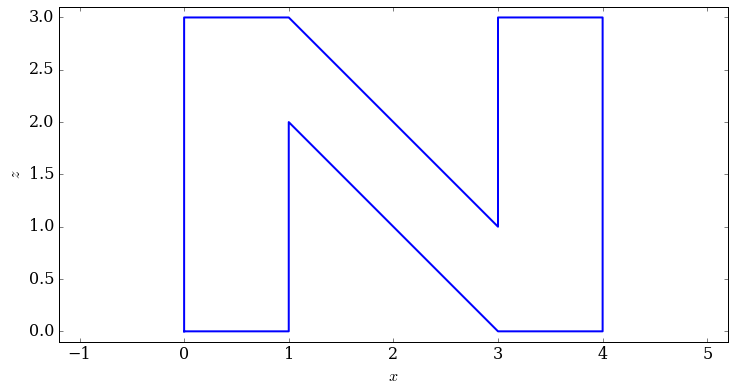

In [3]:
corners = numpy.array([[0,0],[0,3],[1,3],[3,1],[3,3],[4,3],[4,0],[3,0],[1,2],[1,0],[0,0]])
pyplot.plot(corners[:,0],corners[:,1],linewidth=2)
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$z$")
pyplot.axis('equal')
pyplot.ylim(-0.1,3.1);

Set the displacements along the $z=0$ boundary to be zero. All other boundaries are free. Write a finite element method using **triangular** elements to compute the displacement of the body satisfying the equation

$$
  \nabla \sigma + {\bf b} = {\bf 0}
$$

where the body force is given by gravity, ${\bf b} = (0, -m g)^T$ where $g = 9.8$m s${}^{-2}$ and $m$ is the mass of the block, $m = 12000$kg.

First use the obvious sixteen elements with triangles one metre to a side. Then split each element into two triangles that are half a metre to a side.

The standard triangle in $(\xi, \eta)$ coordinates is:

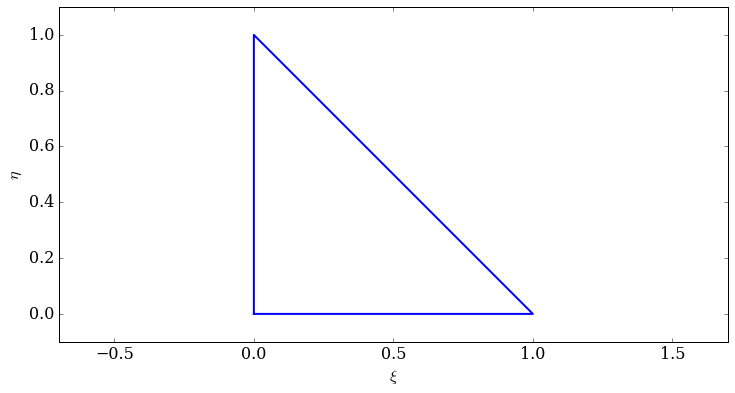

In [4]:
corners = numpy.array([[0.0, 0.0], [1.0, 0.0], [0.0, 1.0], [0.0, 0.0]])
pyplot.plot(corners[:,0],corners[:,1],linewidth=2)
pyplot.xlabel(r"$\xi$")
pyplot.ylabel(r"$\eta$")
pyplot.axis('equal')
pyplot.ylim(-0.1,1.1);

The shape functions for a triangle are

\begin{align}
  N_1(\xi, \eta) &= 1 - \eta - \xi, \\
  N_2(\xi, \eta) &= \eta, \\
  N_3(\xi, \eta) &= \xi.
\end{align}

The two-point Gauss quadrature formula within the standard triangular element is

\begin{equation}
  \int \text{d} \xi \, \text{d} \eta \, f(\eta, \xi) = \frac{1}{6} \left[ f \left( \frac{1}{6}, \frac{1}{6} \right) +  f \left( \frac{2}{3}, \frac{1}{6} \right) +  f \left( \frac{1}{6}, \frac{2}{3} \right) \right].
\end{equation}

Plot the displacement vector at each node.

To save time setting up the mesh, here are hand-written lists of node positions and their links to elements. Also given is the list of fixed nodes (where the displacement vanishes).

In [5]:
nodes_1m = numpy.array([
        [0.0, 0.0],
        [1.0, 0.0],
        [0.0, 1.0],
        [1.0, 1.0],
        [0.0, 2.0],
        [1.0, 2.0],
        [0.0, 3.0],
        [1.0, 3.0],
        [2.0, 1.0],
        [2.0, 2.0],
        [3.0, 0.0],
        [4.0, 0.0],
        [3.0, 1.0],
        [4.0, 1.0],
        [3.0, 2.0],
        [4.0, 2.0],
        [3.0, 3.0],
        [4.0, 3.0]
    ])
IEN_1m = numpy.array([
        [0, 1, 2],
        [1, 3, 2],
        [2, 3, 4],
        [3, 5, 4],
        [4, 5, 6],
        [5, 7, 6],
        [5, 9, 7],
        [8, 9, 5],
        [8, 12, 9],
        [10, 12, 8],
        [10, 11, 12],
        [11, 13, 12],
        [12, 13, 14],
        [13, 15, 14],
        [14, 15, 16],
        [15, 17, 16]
    ], dtype = numpy.int)
fixed_nodes_1m = numpy.array([0, 1, 10, 11], dtype = numpy.int)
free_nodes_1m = numpy.array([2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 17], dtype = numpy.int)

nodes_0_5m = numpy.array([
        [0.0, 0.0],
        [0.5, 0.0],
        [1.0, 0.0],
        [0.0, 0.5],
        [0.5, 0.5],
        [1.0, 0.5],
        [0.0, 1.0],
        [0.5, 1.0],
        [1.0, 1.0],
        [0.0, 1.5],
        [0.5, 1.5],
        [1.0, 1.5],
        [0.0, 2.0],
        [0.5, 2.0],
        [1.0, 2.0],
        [0.0, 2.5],
        [0.5, 2.5],
        [1.0, 2.5],
        [0.0, 3.0],
        [0.5, 3.0],
        [1.0, 3.0],
        [1.5, 1.5],
        [1.5, 2.0],
        [1.5, 2.5],
        [2.0, 1.0],
        [2.0, 1.5],
        [2.0, 2.0],
        [2.5, 0.5],
        [2.5, 1.0],
        [2.5, 1.5],
        [3.0, 0.0],
        [3.5, 0.0],
        [4.0, 0.0],
        [3.0, 0.5],
        [3.5, 0.5],
        [4.0, 0.5],
        [3.0, 1.0],
        [3.5, 1.0],
        [4.0, 1.0],
        [3.0, 1.5],
        [3.5, 1.5],
        [4.0, 1.5],
        [3.0, 2.0],
        [3.5, 2.0],
        [4.0, 2.0],
        [3.0, 2.5],
        [3.5, 2.5],
        [4.0, 2.5],
        [3.0, 3.0],
        [3.5, 3.0],
        [4.0, 3.0]
    ])
IEN_0_5m = numpy.array([
        [0, 1, 3],
        [1, 4, 3],
        [1, 2, 4],
        [2, 5, 4],
        [3, 4, 6],
        [4, 7, 6],
        [4, 5, 7],
        [5, 8, 7],
        [6, 7, 9],
        [7, 10, 9],
        [7, 8, 10],
        [8, 11, 10],
        [9, 10, 12],
        [10, 13, 12],
        [10, 11, 13],
        [11, 14, 13],
        [12, 13, 15],
        [13, 16, 15],
        [13, 14, 16],
        [14, 17, 16],
        [15, 16, 18],
        [16, 19, 18],
        [16, 17, 19],
        [17, 20, 19],
        [17, 23, 20],
        [22, 17, 14],
        [22, 23, 17],
        [21, 22, 14],
        [22, 26, 23],
        [25, 26, 22],
        [21, 25, 22],
        [24, 25, 21],
        [25, 29, 26],
        [28, 29, 25],
        [24, 28, 25],
        [27, 28, 24],
        [28, 36, 29],
        [33, 36, 28],
        [27, 33, 28],
        [30, 33, 27],
        [30, 31, 33],
        [31, 34, 33],
        [31, 32, 34],
        [32, 35, 34],
        [33, 34, 36],
        [34, 37, 36],
        [34, 35, 37],
        [35, 38, 37],
        [36, 37, 39],
        [37, 40, 39],
        [37, 38, 40],
        [38, 41, 40],
        [39, 40, 42],
        [40, 43, 42],
        [40, 41, 43],
        [41, 44, 43],
        [42, 43, 45],
        [43, 46, 45],
        [43, 44, 46],
        [44, 47, 46],
        [45, 46, 48],
        [46, 49, 48],
        [46, 47, 49],
        [47, 50, 49]
    ], dtype = numpy.int)

fixed_nodes_0_5m = numpy.array([0, 1, 2, 30, 31, 32], dtype = numpy.int)
free_nodes_0_5m = numpy.array([3, 4, 5, 6, 7, 8, 9, 
                               10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
                               20, 21, 22, 23, 24, 25, 26, 27, 28, 29,
                               33, 34, 35, 36, 37, 38, 39,
                               40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
                              50], dtype = numpy.int)

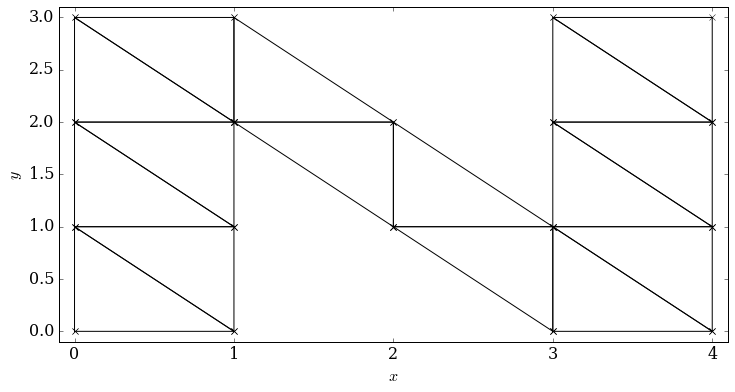

In [6]:
fig=pyplot.figure()
ax=fig.add_subplot(111)
for e in IEN_1m:
    coords = numpy.vstack((nodes_1m[e], nodes_1m[e[0]]))
    ax.plot(coords[:,0], coords[:,1],'kx-')
pyplot.xlim(-0.1,4.1)
pyplot.ylim(-0.1,3.1)
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$y$")
pyplot.show();

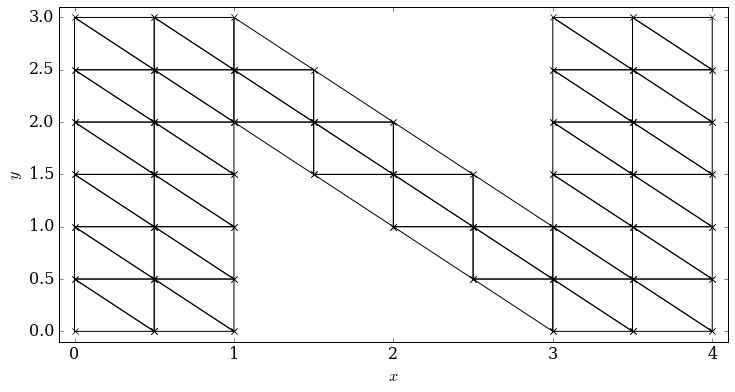

In [7]:
fig=pyplot.figure()
ax=fig.add_subplot(111)
for e in IEN_0_5m:
    coords = numpy.vstack((nodes_0_5m[e], nodes_0_5m[e[0]]))
    ax.plot(coords[:,0], coords[:,1],'kx-')
pyplot.xlim(-0.1,4.1)
pyplot.ylim(-0.1,3.1)
pyplot.xlabel(r"$x$")
pyplot.ylabel(r"$y$")
pyplot.show();